# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2022/03/12 By B Poczos<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

In [1]:
!nvidia-smi

Sun Mar 27 15:53:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
! ls

model.png  sample_data


## Setup

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

## Prepare the data

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)


**Load the MNIST data** </br> 
The MNIST data is included in keras and it is easy to load

In [5]:

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


**Scale the images to the [0,1] range

In [6]:

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

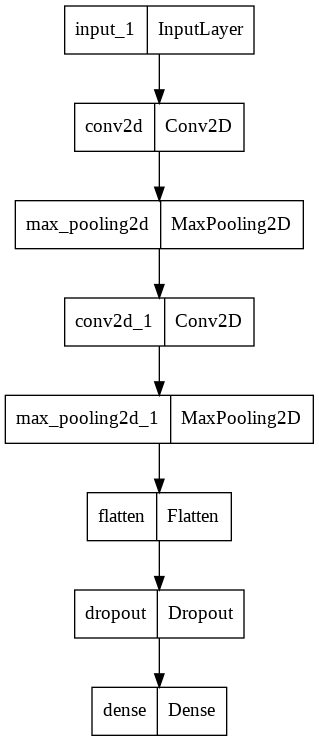

In [8]:
keras.utils.plot_model(model)

## Train the model

In [9]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 5s 6ms/step - loss: 0.3771 - accuracy: 0.8847 - val_loss: 0.0890 - val_accuracy: 0.9735
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1231 - accuracy: 0.9624 - val_loss: 0.0668 - val_accuracy: 0.9823
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0916 - accuracy: 0.9716 - val_loss: 0.0496 - val_accuracy: 0.9858
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0730 - accuracy: 0.9771 - val_loss: 0.0445 - val_accuracy: 0.9880
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0365 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0576 - accuracy: 0.9815 - val_loss: 0.0396 - val_accuracy: 0.9888
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9828 - val_loss: 0.0371 - val_accuracy: 0.9892
Epoch 

## Evaluate the trained model

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02495080605149269
Test accuracy: 0.991100013256073


In [11]:
test_img_num=26

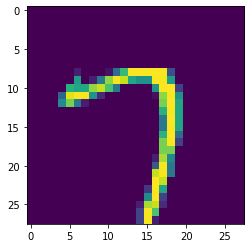

In [16]:
plt.imshow(x_test[test_img_num,:,:,0])

In [13]:
test_img_1x28x28x1=np.broadcast_to(x_test[test_img_num],[1,28,28,1])

In [14]:
predicted_label=np.argmax(model.predict(test_img_1x28x28x1))
print(predicted_label)

7
